In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

%matplotlib inline

In [2]:
df = pd.read_csv('covid.csv')

In [3]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

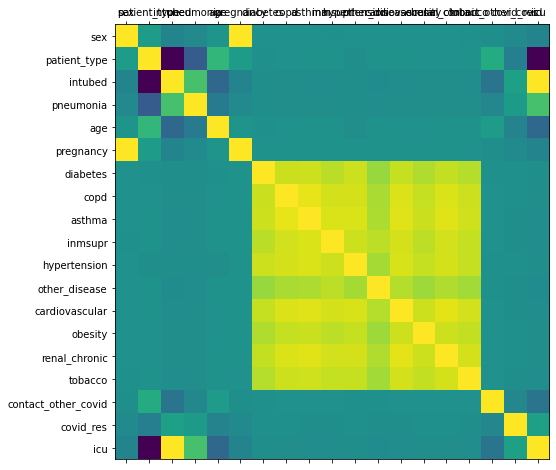

In [4]:
def plot_corr(df, size=8):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  
plot_corr(df)

### Transformando as datas de morte missing em valores falsos, e datas de morte verdadeiras para true

As datas nulas ou missing são representadas como '9999-99-99', todos os campos que tiverem esse valor, teremos que transformar em False, ou seja, a pessoa não veio a obito, caso exista uma data real transformamos o valor do campo em True, que no caso a pessoa veio a obito

In [5]:
def toBool(value):
    if value in'9999-99-99':
        return 0
    else:
        return 1

In [6]:
dates = df['date_died'].values
new_dates = np.array(list(map(toBool, dates)))
new_dates

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
df['died'] = new_dates

### Retiramos as colunas que não são interessantes como atributo de treinamento.

In [8]:
df = df.drop(columns=['id', 'entry_date', 'date_symptoms', 'date_died'], axis=1)

In [9]:
df.head()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,died
0,2,1,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97,0
1,2,1,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97,0
2,1,2,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2,0
3,2,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2,0
4,1,2,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,1


### Separando atributos de treinamento da variável target

In [10]:
atributos = df.columns.drop('died')

In [11]:
target = ['died']

In [12]:
X = df[atributos].values
Y = df[target].values

### Separando dados de treino e dados de teste

In [13]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.25, random_state = 2)

In [14]:
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

75.00% nos dados de treino
25.00% nos dados de teste


### Tratando valores missing ocultos

In [15]:
df.isnull().values.any()

False

Na documentação do dataset, valores missing estão representados como 97, 98, 99, menos na coluna idade.

In [16]:
preenche_0 = SimpleImputer(missing_values = 97, strategy = "most_frequent")
# preenche_1 = SimpleImputer(missing_values = 98, strategy = "most_frequent")
preenche_2 = SimpleImputer(missing_values = 99, strategy = "most_frequent")

Substituindo os valores iguais a 97, 98, 99 pelo valor mais frequente dos dados

In [ ]:
X_treino = preenche_0.fit_transform(X_treino)
X_teste = preenche_0.fit_transform(X_teste)

# X_treino = preenche_1.fit_transform(X_treino)
# X_teste = preenche_1.fit_transform(X_teste)

X_treino = preenche_2.fit_transform(X_treino)
X_teste = preenche_2.fit_transform(X_teste)

### Criando Modelo usando o algoritmo de classificação de Naive Bayes

In [ ]:
modelo_v1 = GaussianNB()

In [ ]:
modelo_v1.fit(X_treino, Y_treino.ravel())

### Verificando acurácia do modelo

In [ ]:
nb_predict_train = modelo_v1.predict(X_teste)


In [ ]:
print('X_teste ', X_teste.shape)
print('X_treino ', X_treino.shape)
print('Y_teste ', Y_teste.shape)
print('Y_treino ', Y_treino.shape)

In [ ]:
Y_treino.shape

In [ ]:
print("Acurácia: {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_train)))